In [ ]:
import pandas as pd
data = pd.read_csv('/content/train.csv')
data.head(11)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
5,5,30,59,29,Red,Pulses,10,0,9,20-20
6,6,27,62,53,Sandy,Paddy,26,15,22,28-28
7,7,36,62,44,Red,Pulses,30,12,35,14-35-14
8,8,36,51,32,Loamy,Tobacco,19,17,29,17-17-17
9,9,28,50,35,Red,Tobacco,25,12,16,20-20


In [ ]:
from sklearn.preprocessing import LabelEncoder

data = data.drop(columns=['id'])  # Drop 'id' for training
label_encoders = {}

# Encode 'Soil Type' and 'Crop Type'
for col in ['Soil Type', 'Crop Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode target: Fertilizer Name
target_le = LabelEncoder()
data['Fertilizer Name'] = target_le.fit_transform(data['Fertilizer Name'])


In [ ]:
X = data.drop(columns=['Fertilizer Name'])
y = data['Fertilizer Name']

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 8
[LightGBM] [Info] Start training from score -1.884866
[LightGBM] [Info] Start training from score -1.880057
[LightGBM] [Info] Start training from score -1.897538
[LightGBM] [Info] Start training from score -1.911544
[LightGBM] [Info] Start training from score -1.909121
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094845


LGBMClassifier(n_estimators=200, random_state=42)

In [ ]:
test = pd.read_csv('/content/test.csv')

# Encode test categorical columns using saved encoders
for col in ['Soil Type', 'Crop Type']:
    le = label_encoders[col]
    test[col] = le.transform(test[col])

X_test = test.drop(columns=['id'])

In [ ]:
import numpy as np

probs = model.predict_proba(X_test)
top3 = np.argsort(probs, axis=1)[:, -3:][:, ::-1]  # Top 3 classes
top3_labels = target_le.inverse_transform(top3.ravel()).reshape(top3.shape)

# Convert to space-delimited string per row
preds = [' '.join(row) for row in top3_labels]

In [ ]:
# Preview top 5 predictions
for i in range(5):
    print(f"ID: {test['id'].iloc[i]} → Top-3 Fertilizers: {preds[i]}")

ID: 750000 → Top-3 Fertilizers: 28-28 DAP 10-26-26
ID: 750001 → Top-3 Fertilizers: 17-17-17 20-20 10-26-26
ID: 750002 → Top-3 Fertilizers: 14-35-14 10-26-26 20-20
ID: 750003 → Top-3 Fertilizers: 14-35-14 17-17-17 10-26-26
ID: 750004 → Top-3 Fertilizers: 20-20 10-26-26 28-28


In [ ]:
import matplotlib.pyplot as plt

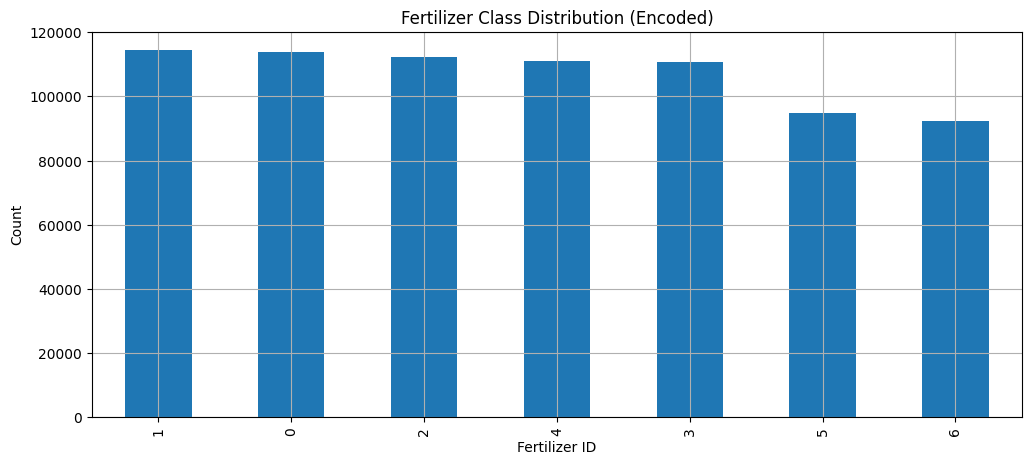

In [ ]:
y.value_counts().plot(kind='bar', figsize=(12, 5))
plt.title("Fertilizer Class Distribution (Encoded)")
plt.xlabel("Fertilizer ID")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 8
[LightGBM] [Info] Start training from score -1.884866
[LightGBM] [Info] Start training from score -1.880057
[LightGBM] [Info] Start training from score -1.897538
[LightGBM] [Info] Start training from score -1.911544
[LightGBM] [Info] Start training from score -1.909121
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094845


LGBMClassifier(n_estimators=200, random_state=42)

In [ ]:
test = pd.read_csv('/content/test.csv')

# Encode categorical features using previously saved encoders
for col in ['Soil Type', 'Crop Type']:
    le = label_encoders[col]
    test[col] = le.transform(test[col])

X_test = test.drop(columns=['id'])
probs = model.predict_proba(X_test)

import numpy as np

top3 = np.argsort(probs, axis=1)[:, -3:][:, ::-1]
top3_labels = target_le.inverse_transform(top3.ravel()).reshape(top3.shape)
preds = [' '.join(row) for row in top3_labels]

In [ ]:
submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': preds
})
submission.to_csv('submission.csv', index=False)

# To download from Colab
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test = pd.read_csv('/content/test.csv')
X_test = test.drop(columns=['id'])

In [ ]:
for col in ['Soil Type', 'Crop Type']:
    le = label_encoders[col]   # fetch correct encoder
    test[col] = le.transform(test[col])

In [ ]:
print(test.dtypes)

id             int64
Temparature    int64
Humidity       int64
Moisture       int64
Soil Type      int64
Crop Type      int64
Nitrogen       int64
Potassium      int64
Phosphorous    int64
dtype: object


In [ ]:
X_test = test.drop(columns=['id'])
probs = model.predict_proba(X_test)

In [ ]:
import numpy as np

top3 = np.argsort(probs, axis=1)[:, -3:][:, ::-1]
top3_labels = target_le.inverse_transform(top3.ravel()).reshape(top3.shape)
preds = [' '.join(row) for row in top3_labels]

In [ ]:
submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': preds
})
submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

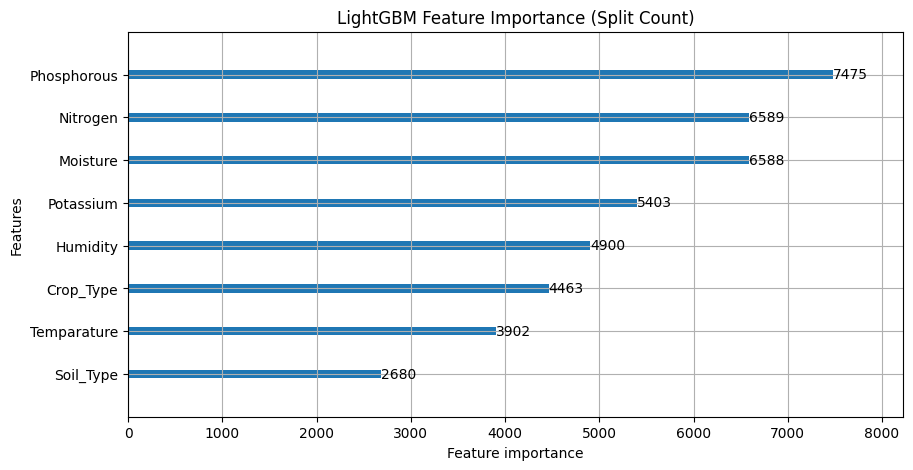

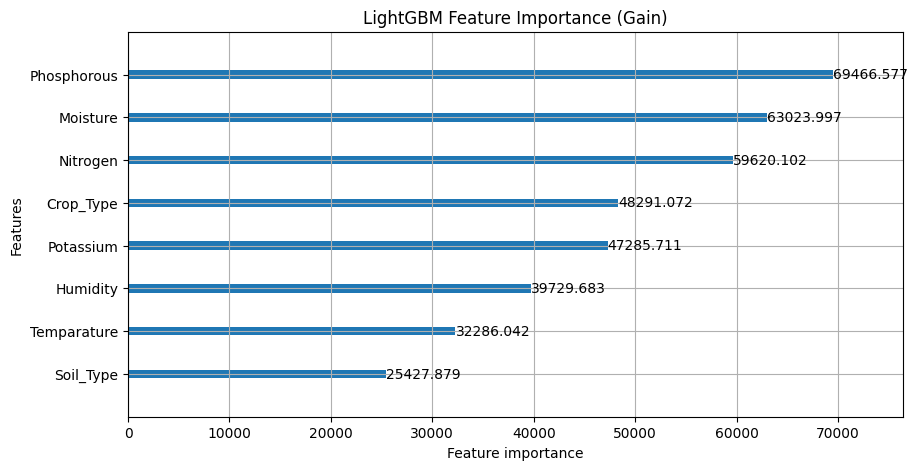

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Plot feature importance based on number of times used in splits
lgb.plot_importance(model, max_num_features=10, importance_type='split', figsize=(10, 5))
plt.title("LightGBM Feature Importance (Split Count)")
plt.show()

# You can also use 'gain' (total info gain from splits)
lgb.plot_importance(model, max_num_features=10, importance_type='gain', figsize=(10, 5))
plt.title("LightGBM Feature Importance (Gain)")
plt.show()

In [ ]:
!pip install shap